# DSCI 100: Final Project Title


By: Arshia, James, Lily, and Raina

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(gridExtra)
set.seed(1)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Introduction

## provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

## clearly state the question you tried to answer with your project

Can player experience level and age predict the number of hours all players spend playing minecraft?

## identify and fully describe the dataset that was used to answer the question

|Name|Type|Variables Definiton|
|----|----|----|
|Experience|factor|Players experience level|
|Subscribe|logical|Subscription status|
|hashedEmail|character|Encrypted players emails|
|played_hours|numeric| Time played minecraft |
|Name|character|Players name|
|Gender|factor|Players gender|
|Age| numeric|Players age|


# 2.0 Methods and Results

### 2.1 Load in data

In [2]:
players_data<-read_csv("https://raw.githubusercontent.com/lilypurdy/toy_ds_project/refs/heads/main/players%20(2).csv")
head(players_data, 5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


### 2.2 Wrangle and Clean Data

In [3]:
clean_players_data <- read_csv("https://raw.githubusercontent.com/Jamesnam1/toy_ds_project/refs/heads/main/players.csv",
    col_names = c("experience", "subscribed", "hashed_email", "hours_played", "name", "gender", "age"),
                col_types = list("c", "l", "c", "d", "c", "c", "i"))
clean_players_data

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


experience,subscribed,hashed_email,hours_played,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
experience,NA,hashedEmail,NA,name,gender,NA
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


In [4]:
players <- clean_players_data |> select(-hashed_email, -subscribed, -name, -gender) |>
filter(age!= "NA") |>
filter(hours_played >0.1)
head(players, 5)

experience,hours_played,age
<chr>,<dbl>,<int>
Pro,30.3,9
Veteran,3.8,17
Amateur,0.7,21
Veteran,1.6,23
Beginner,1.5,25


### 2.3 Summarize Data

In [5]:
mean_values <- players |> summarise(
    mean_played_hours = mean(hours_played, na.rm = TRUE),
    mean_age = mean(age, na.rm = TRUE))

mean_values

mean_played_hours,mean_age
<dbl>,<dbl>
15.02895,20.47368


### 2.4 Visualization

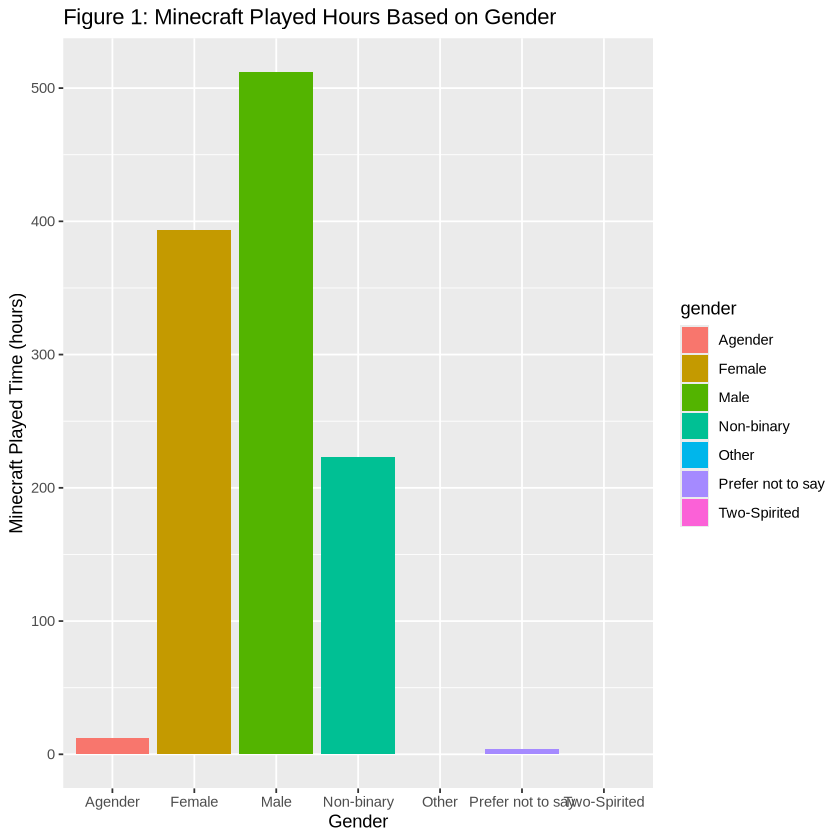

In [6]:
ggplot(players_data, aes(x = gender, y = played_hours, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 1: Minecraft Played Hours Based on Gender", x = "Gender", y = "Minecraft Played Time (hours)")


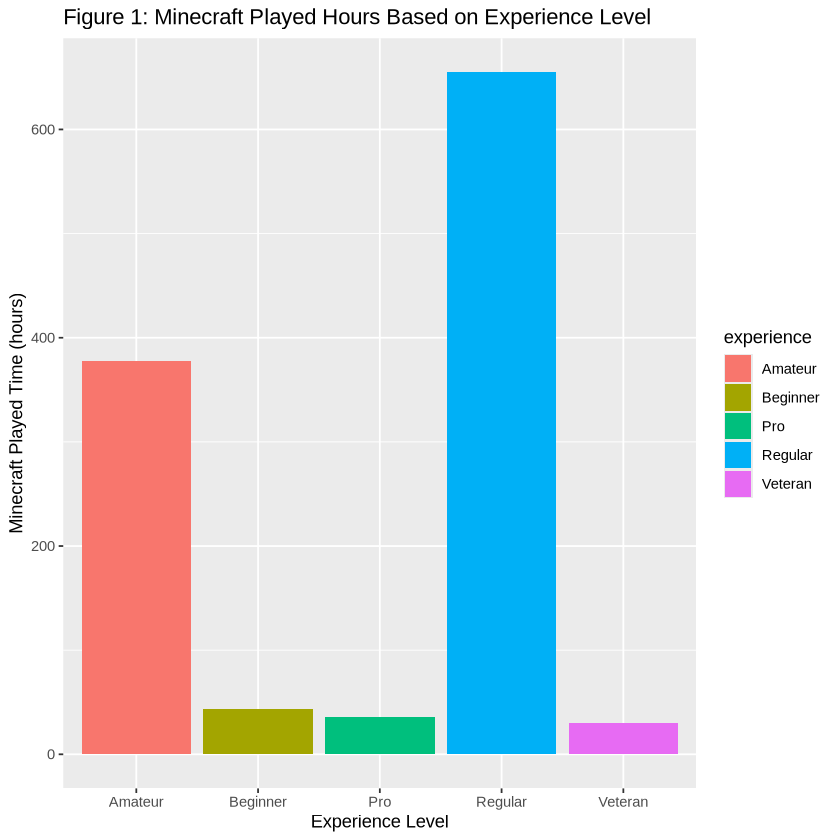

In [7]:
ggplot(players, aes(x = experience, y = hours_played, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 1: Minecraft Played Hours Based on Experience Level", x = "Experience Level", y = "Minecraft Played Time (hours)")


`geom_smooth()` using formula = 'y ~ x'


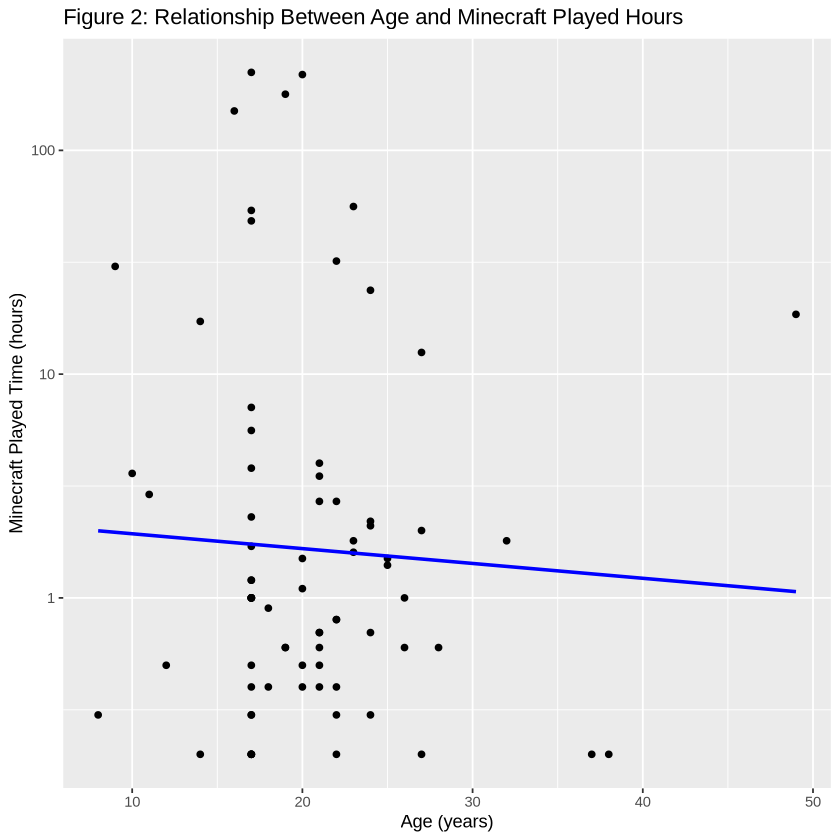

In [8]:
ggplot(players, aes(x = age, y = hours_played)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    labs(title = "Figure 2: Relationship Between Age and Minecraft Played Hours", 
         x = "Age (years)", 
         y = "Minecraft Played Time (hours)") +
    scale_y_log10(labels = label_comma())


## 2.5 Splitting Data

In [9]:
#set the training data to 75 percent of the overall percentage
set.seed(1)

split_data <- initial_split(players, prop = 3/4, strata = hours_played)

training_data <- training(split_data)
testing_data <- testing(split_data)

head(training_data)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


experience,hours_played,age
<chr>,<dbl>,<int>
Amateur,0.2,22
Amateur,0.5,17
Regular,0.3,8
Regular,0.6,28
Beginner,0.6,26
Veteran,0.4,20


# Demo Regression 2

In [136]:
set.seed(1)
data_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

data_recipe <- recipe(hours_played ~ age, data = training_data)

data_fit <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(data_spec) |>
  fit(data = training_data)

data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
     39.361       -1.213  


In [137]:
set.seed(1)

data_test_results <- data_fit |>
  predict(testing_data) |>
  bind_cols(testing_data) |>
  metrics(truth = hours_played, estimate = .pred)

data_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.075445e+01
rsq,standard,7.968871e-04
mae,standard,2.343310e+01


In [20]:
set.seed(1)

age_prediction_grid <- tibble(
  age = c(
    players |> select(age) |> min(),
    players |> select(age) |> max()
  )
)

age_prediction_grid


age
<int>
8
49


In [98]:
set.seed(1)

data_preds <- data_fit |>
  predict(age_prediction_grid) |>
  bind_cols(age_prediction_grid)
data_preds

.pred,age
<dbl>,<int>
NA,NA
NA,NA


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


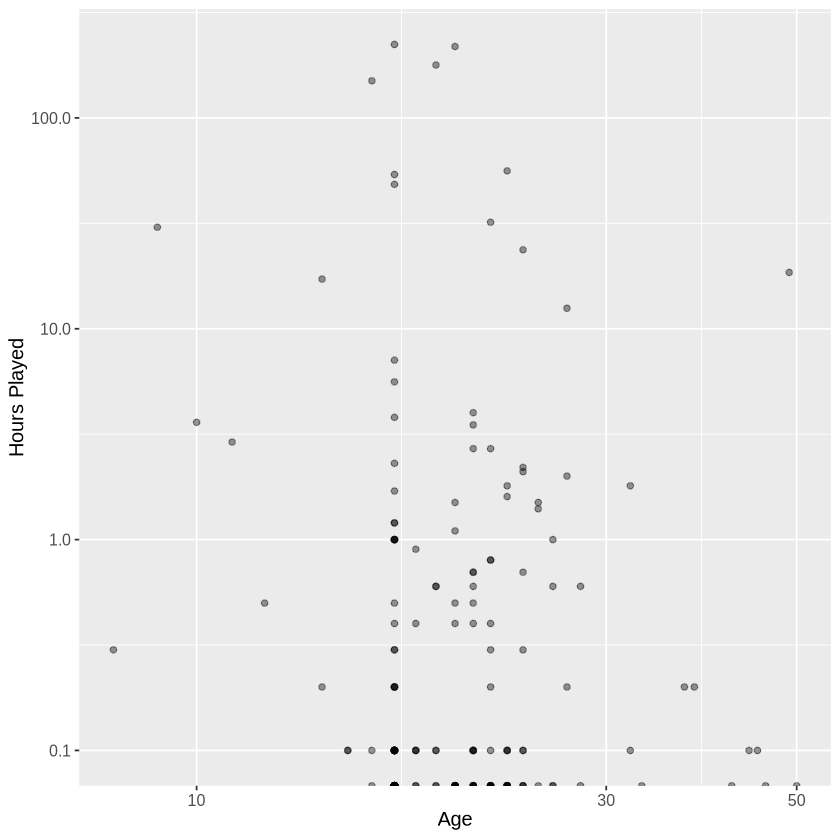

In [99]:
set.seed(1)

data_plot_final <- ggplot(clean_players_data, aes(x = age, y = hours_played)) +
  geom_point(alpha = 0.4) +
  geom_line(data = data_preds,
            mapping = aes(x = age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Age") +
  ylab("Hours Played") +
  scale_y_continuous(labels = dollar_format()) +
  scale_y_log10(labels=comma)+
  scale_x_log10(labels=comma)+
  theme(text = element_text(size = 12))

data_plot_final

# Demo Regression 1

In [10]:
set.seed(1)

data_recipe <- recipe(hours_played ~ age, data = training_data) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

data_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

data_vfold <- vfold_cv(training_data, v = 5, strata = hours_played)

data_wkflw <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(data_spec)

data_wkflw

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 2 breaks instead.”


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [11]:
set.seed(1)

gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 5))

data_results <- data_wkflw |>
  tune_grid(resamples = data_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

data_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,46.63234,5,10.13984,Preprocessor1_Model1
6,rmse,standard,42.68174,5,11.76399,Preprocessor1_Model2
11,rmse,standard,42.77472,5,11.16221,Preprocessor1_Model3
16,rmse,standard,40.63729,5,10.89040,Preprocessor1_Model4


In [12]:
# show only the row of minimum RMSPE
set.seed(1)

data_min <- data_results |>
  filter(mean == min(mean))

data_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,rmse,standard,40.63729,5,10.8904,Preprocessor1_Model4


In [13]:
# Extract best K value
set.seed(1)

kmin <- data_min |> pull(neighbors)

# Define model specification with best K
sacr_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

# Fit the model
data_fit <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(sacr_spec) |>
  fit(data = training_data)

# Predict and evaluate RMSE
data_summary <- data_fit |>
  predict(testing_data) |>
  bind_cols(testing_data) |>
  metrics(truth = hours_played, estimate = .pred) |>
  filter(.metric == "rmse")

data_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,40.15926


In [14]:
# Define the value of K (replace with actual selected K if available)
set.seed(1)


# Create prediction grid over age range
age_prediction_grid <- tibble(
  age = seq(
    from = clean_players_data |> select(age) |> min(),
    to = clean_players_data |> select(age) |> max(),
      by= 10
  )
)


age_prediction_grid


ERROR: Error in seq.default(from = min(select(clean_players_data, age)), to = max(select(clean_players_data, : 'from' must be a finite number


In [ ]:
set.seet(1)
# Generate predictions from the fitted model
data_preds <- data_fit |>
  predict(age_prediction_grid) |>
  bind_cols(age_prediction_grid)

# Plot actual data and predicted line
options(repr.plot.width = 10, repr.plot.height = 10) 
plot_final <- ggplot(clean_players_data, aes(x = age, y = hours_played)) +
  geom_point(alpha = 0.4) +
  geom_line(data = data_preds,
  mapping = aes(x = age, y = .pred),
  color = "steelblue",
  linewidth = 1) +
  xlab("Age") +
  ylab("Hours Played") +
  ggtitle(paste0("K = ", kmin)) +
    scale_y_log10(labels=comma)+
    scale_x_log10(labels=comma)+

  theme_minimal(base_size = 12)

# Display the plot
plot_final


## 2.6 Performing Data Analysis:

In order to predict the "hours_played" using "Age" and "experience", we chose to build a linear regression model to find the correlation between "hours_played" and "Age", and "hours_played" "experience." The first step is to set up the recipe equation to determine the independent variable, dependent variable, and the range of data to be selected. Then I choose linear_reg() in linear regression to complete the specialization, and then build the model through workflow(). Finally, ggplot is used to help linear regression to achieve visualization, so that the relationship between the two can be observed from the image in a more simple and clear way.

### Building model & Visualization (Age & Hours_Played - Training Data)

In [232]:
# Recipe

age_recipe_training <- recipe(hours_played ~ age, data = training_data)

# Model Specification
age_spec_training <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# Workflow
age_model_training <- workflow() |>
  add_recipe(age_recipe_training) |>
  add_model(age_spec_training) |>
  fit(data = training_data)

# Generate predictions
age_preds_training <- age_model_training |>
  predict(training_data) |>
  bind_cols(training_data)

age_preds_training <- age_preds_training |>
    mutate(hours_played = age^3)

Warning message in transformation$transform(x):
“NaNs produced”
Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_line()`).”


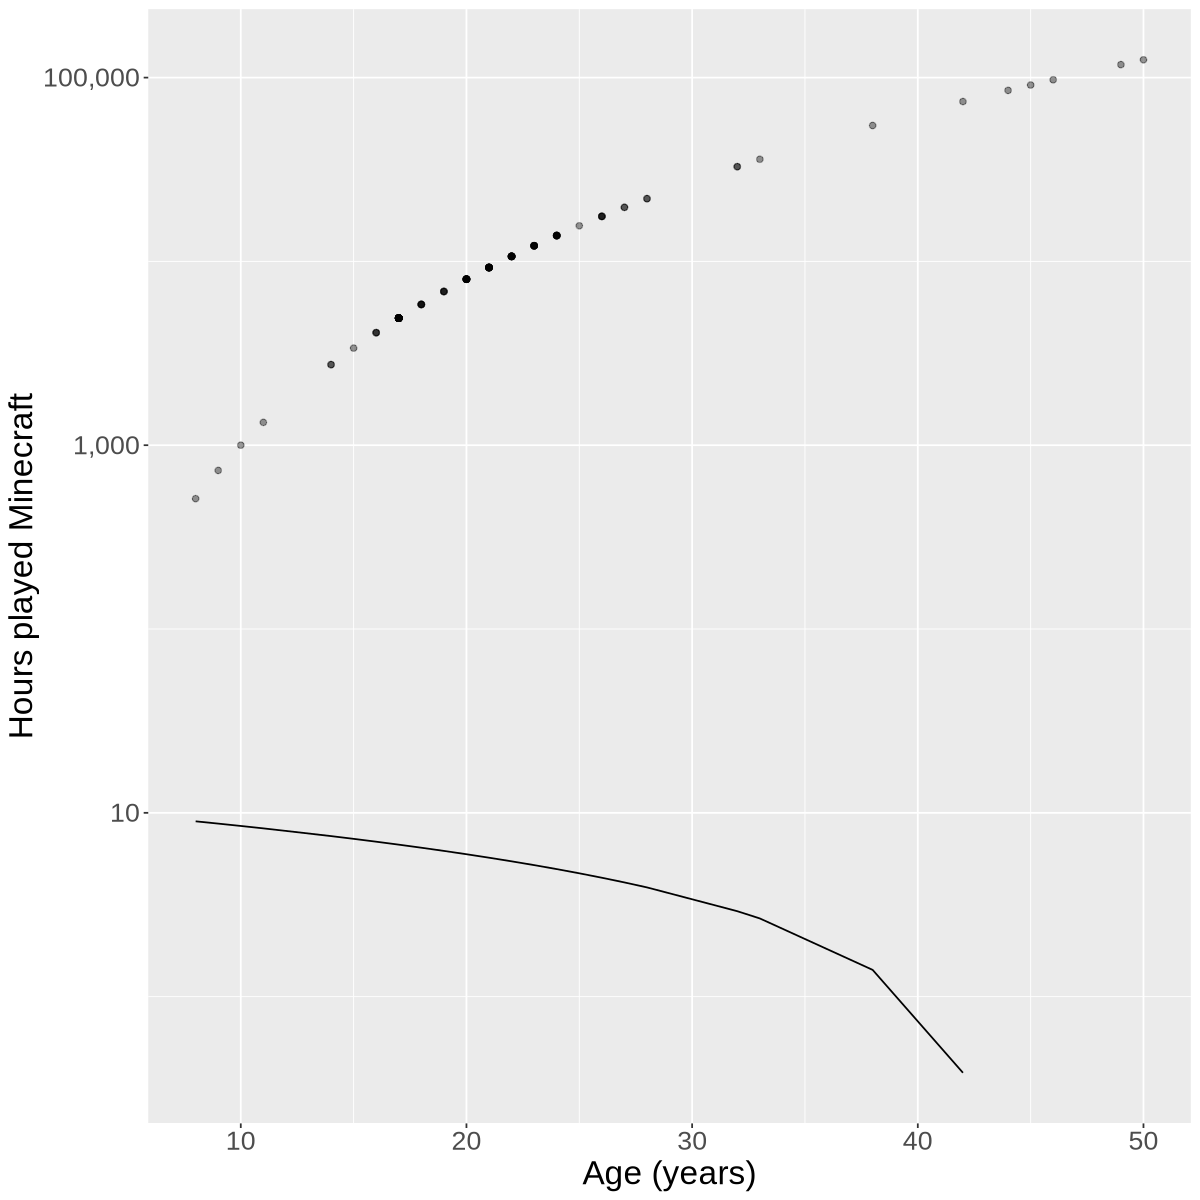

In [233]:

# Visualization
age_predictions_training <- ggplot(data = age_preds_training, aes(x = age, y = hours_played)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = .pred), color = "black") +
  xlab("Age (years)") +
  ylab("Hours played Minecraft") +
  theme(text = element_text(size = 20)) +
  scale_y_log10(labels = label_comma())

age_predictions_training 

# Discussion

In [234]:
#Recipe
trestbps_recipe_training <- recipe(age ~ trestbps, data = training_data)

#Specification
trestbps_spec_training <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

#Workflow
trestbps_model_training <- workflow() |>
  add_recipe(trestbps_recipe_training) |>
  add_model(trestbps_spec_training) |>
  fit(data = training_data)

trestbps_preds_training <- trestbps_model_training |>
  predict(training_data)|>
  bind_cols(training_data)

#Visualization
trestbps_predictions_training <- trestbps_preds_training |>
     ggplot(aes(x = trestbps, y = age)) +
        geom_point(alpha = 0.4) +
        geom_line(
             mapping = aes(x = trestbps, y = .pred), 
             color = "black") +
         xlab("Resting blood pressure (trestbps)") +
         ylab("Age - Level of Heart Disease") +
         theme(text = element_text(size = 20))

trestbps_predictions_training


ERROR: [1m[33mError[39m in `recipe()`:[22m
[1m[22m[31m✖[39m Misspelled variable name or in-line functions detected.
[36mℹ[39m The following function/misspelling was found: `trestbps`.
[36mℹ[39m Use steps to do transformations instead.
[36mℹ[39m If your modeling engine uses special terms in formulas, pass that formula to
  workflows as a model formula (`?parsnip::model_formula()`).


In [105]:
# Split data
split_data <- initial_split(players, prop = 3/4, strata = played_hours)

# Create training and testing sets
training_data <- training(split_data)
testing_data <- testing(split_data)

# Recipe
age_recipe_training <- recipe(played_hours ~ Age, data = training_data)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Model Specification
age_spec_training <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# Workflow
age_model_training <- workflow() |>
  add_recipe(age_recipe_training) |>
  add_model(age_spec_training) |>
  fit(data = training_data)

# Generate predictions
age_preds_training <- age_model_training |>
  predict(training_data) |>
  bind_cols(training_data)

# Visualization
age_predictions_training <- ggplot(data = age_preds_training, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = .pred), color = "black") +
  xlab("Age (years)") +
  ylab("Hours played Minecraft") +
  theme(text = element_text(size = 20))

age_predictions_training 

ERROR: [1m[33mError[39m in `mc_cv()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `played_hours` doesn't exist.
